# Aprendizaje supervisado - Árboles de decisión
Los árboles de decisión, como todo algoritmo de aprendizaje automático supervisado, tienen como función la de predecir la variable respuesta en función de las covariables. Observe que estas covariables son el equivalente de las variables predictoras o variables independientes en las regresiones lineales o logísticas.

### Concepto de árboles de decisión
El aprendizaje por intermedio de árboles es, quizás, una de las técnicas más utilizadas para el aprendizaje inductivo, presenta una gran robustez ante datos con ruido (atípicos). Por lo general, las covariables y las variable respuesta son de tipo categórico pero se pueden presentar árboles con datos numéricos. El árbol se construyen basados en una serie de condiciones que pueden posteriormente mapearse a reglas de clasificación.

Cuando se tiene una instancia nueva para clasificar, esta instancia se compara con las diferentes ramas y condiciones, que van del nodo raíz a las ramas, generadas en el árbol para poder lograr su clasificación.

<p align="center">
<img src="arbold.jpg" width="600">
</p>

La figura anterior muestra un árbol de decisión muy simple con una covariable numérica (IMC) y otra categórica dicotómica (Antecedentes obesidad Si/No), y una clase con dos valores: "Llevar una vida sana" y "Hacer ejercicio. El nodo raíz es aque que determina el algoritmo que tiene mayor ganancia de información.

### Tipos de árboles
Dependiendo del tipo de variable de respuesta o etiqueta, los árboles pueden ser de dos tipos:

* **Árboles de regresión:** son aquellos donde la variable respuesta y es cuantitativa.
* **Árboles de clasificación:** son aquellos donde la variable respuesta y es cualitativa.

#### Árboles de regresión
![Arbol de regresión](ilustracion_arb_regresion.png)

Los árboles de regresión desarrollan varias particiones para las covariables comparando estas con puntos de corte que permiten dividir las instancias en hiper-rectángulos que agrupan en cada uno las predicciones $\hat{y}$.

Para desarrollar un árbol de regresión se deben seguir los siguientes pasos generales:

1. Encontrar la covariable que permita predecir mejor la variable respuesta.
2. Encontrar el mejor punto de corte $c$ para esta predicción.
3. Repetir hasta tener todas las instancias clasificadas o que se alcance un criterio de parada que por lo general es minimizar la función de costos $\sum_{i=1}^m(y_{i}-\hat{y_{i}})^2$

## Carga del conjunto de datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
url = 'https://raw.githubusercontent.com/JASDataCTG/Diplomado-ML/main/Modulo%203/Datasets/Movie_regressiones.csv'
df = pd.read_csv(url, header = 0)

In [7]:
df.head()

,Costo de marketing,Costo de produccion,Multiplex cubiertos,Ganancias,Duracion pelicula,Rating actor principal,Rating actriz principal,Rating director,Rating del productor,Ratig criticos,Visualizaciones trailer,Disponibilidad en 3D,Tiempo realizacion,Hashtags Twitter,Genero,Promedio edad actores,Numero multiplex,Coleccion
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Costo de marketing       506 non-null    float64
 1   Costo de produccion      506 non-null    float64
 2   Multiplex cubiertos      506 non-null    float64
 3   Ganancias                506 non-null    float64
 4   Duracion pelicula        506 non-null    float64
 5   Rating actor principal   506 non-null    float64
 6   Rating actriz principal  506 non-null    float64
 7   Rating director          506 non-null    float64
 8   Rating del productor     506 non-null    float64
 9   Ratig criticos           506 non-null    float64
 10  Visualizaciones trailer  506 non-null    int64  
 11  Disponibilidad en 3D     506 non-null    object 
 12  Tiempo realizacion       494 non-null    float64
 13  Hashtags Twitter         506 non-null    float64
 14  Genero                   5

### Imputación de valores faltantes

In [9]:
df['Tiempo realizacion'].mean()

157.3914979757085

In [10]:
df['Tiempo realizacion'].fillna(value = df['Tiempo realizacion'].mean(), inplace = True)

In [11]:
df.head()

,Costo de marketing,Costo de produccion,Multiplex cubiertos,Ganancias,Duracion pelicula,Rating actor principal,Rating actriz principal,Rating director,Rating del productor,Ratig criticos,Visualizaciones trailer,Disponibilidad en 3D,Tiempo realizacion,Hashtags Twitter,Genero,Promedio edad actores,Numero multiplex,Coleccion
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Costo de marketing       506 non-null    float64
 1   Costo de produccion      506 non-null    float64
 2   Multiplex cubiertos      506 non-null    float64
 3   Ganancias                506 non-null    float64
 4   Duracion pelicula        506 non-null    float64
 5   Rating actor principal   506 non-null    float64
 6   Rating actriz principal  506 non-null    float64
 7   Rating director          506 non-null    float64
 8   Rating del productor     506 non-null    float64
 9   Ratig criticos           506 non-null    float64
 10  Visualizaciones trailer  506 non-null    int64  
 11  Disponibilidad en 3D     506 non-null    object 
 12  Tiempo realizacion       506 non-null    float64
 13  Hashtags Twitter         506 non-null    float64
 14  Genero                   5

### Creación de variables dummy

In [13]:
list(dict.fromkeys(df['Genero']))

['Thriller', 'Drama', 'Comedy', 'Action']

In [14]:
df = pd.get_dummies(df, columns = ['Disponibilidad en 3D', 'Genero'], drop_first = True)

In [15]:
df.head()

,Costo de marketing,Costo de produccion,Multiplex cubiertos,Ganancias,Duracion pelicula,Rating actor principal,Rating actriz principal,Rating director,Rating del productor,Ratig criticos,Visualizaciones trailer,Tiempo realizacion,Hashtags Twitter,Promedio edad actores,Numero multiplex,Coleccion,Disponibilidad en 3D_YES,Genero_Comedy,Genero_Drama,Genero_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


### División de la variable predicha y el vector de características

In [16]:
X = df.loc[:, df.columns!= 'Coleccion']

In [17]:
X.head()

,Costo de marketing,Costo de produccion,Multiplex cubiertos,Ganancias,Duracion pelicula,Rating actor principal,Rating actriz principal,Rating director,Rating del productor,Ratig criticos,Visualizaciones trailer,Tiempo realizacion,Hashtags Twitter,Promedio edad actores,Numero multiplex,Disponibilidad en 3D_YES,Genero_Comedy,Genero_Drama,Genero_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [18]:
X.shape

(506, 19)

In [19]:
y = df['Coleccion']
type(y)

pandas.core.series.Series

In [20]:
y.head()

0    48000
1    43200
2    69400
3    66800
4    72400
Name: Coleccion, dtype: int64

In [21]:
y.shape

(506,)

### Creación del conjunto de entrenamiento y validación

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
X_train.head()

,Costo de marketing,Costo de produccion,Multiplex cubiertos,Ganancias,Duracion pelicula,Rating actor principal,Rating actriz principal,Rating director,Rating del productor,Ratig criticos,Visualizaciones trailer,Tiempo realizacion,Hashtags Twitter,Promedio edad actores,Numero multiplex,Disponibilidad en 3D_YES,Genero_Comedy,Genero_Drama,Genero_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,0,0,0,1
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,0,0,0,0
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,1,1,0,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,1,0,0,1
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,1,0,0,0


In [25]:
X_train.shape

(404, 19)

In [26]:
X_test.shape

(102, 19)

### Entrenamiento del árbol de regresión

In [27]:
from sklearn import tree

In [28]:
arbolreg = tree.DecisionTreeRegressor(max_depth = 5)

In [29]:
arbolreg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

### Predicción en el conjunto de entrenamiento y validación

In [30]:
y_train_pred = arbolreg.predict(X_train)
y_test_pred = arbolreg.predict(X_test)

In [31]:
y_test_pred

array([ 43576.11940299, 100000.        ,  43576.11940299,  26894.11764706,
        43576.11940299,  43576.11940299,  43576.11940299,  43576.11940299,
        43576.11940299,  43576.11940299,  17838.0952381 ,  26894.11764706,
        26894.11764706,  26894.11764706,  88920.        ,  60168.        ,
        43576.11940299,  68666.66666667,  56451.61290323,  43576.11940299,
        43576.11940299,  43576.11940299,  43576.11940299,  43576.11940299,
        43576.11940299, 100000.        ,  43576.11940299,  35480.95238095,
        98000.        ,  35480.95238095,  26894.11764706,  26894.11764706,
        43576.11940299,  43576.11940299,  43576.11940299,  35480.95238095,
        17838.0952381 , 100000.        ,  24504.76190476,  24504.76190476,
        43576.11940299,  43576.11940299,  43576.11940299,  24504.76190476,
        43576.11940299,  43576.11940299,  39288.88888889,  35480.95238095,
        29910.34482759,  56451.61290323,  35480.95238095,  39288.88888889,
        43576.11940299,  

### Métricas del modelo

In [32]:
from sklearn.metrics import r2_score, mean_squared_error

In [33]:
# Desviación estándar de la varianza inexplicada
mean_squared_error(y_test, y_test_pred)

91585533.7795512

In [34]:
# Proporción de la varianza total explicada por el modelo
r2_score(y_train, y_train_pred)

0.922900031419891

In [35]:
r2_score(y_test, y_test_pred)

0.7155062879984331

### Gráficar árbol de regresión

In [36]:
datos_graf = tree.export_graphviz(arbolreg, out_file = None, feature_names = X_train.columns, filled = True)

In [37]:
from IPython.display import Image

In [38]:
import pydotplus

In [50]:
graph = pydotplus.graph_from_dot_data(datos_graf)
Image(graph.create_png())
graph.write_png('arboloriginal.png') # Si se desea guardar el árbol

True

### Controlando el crecimiento del árbol

#### Por el máximo nivel de crecimiento del árbol

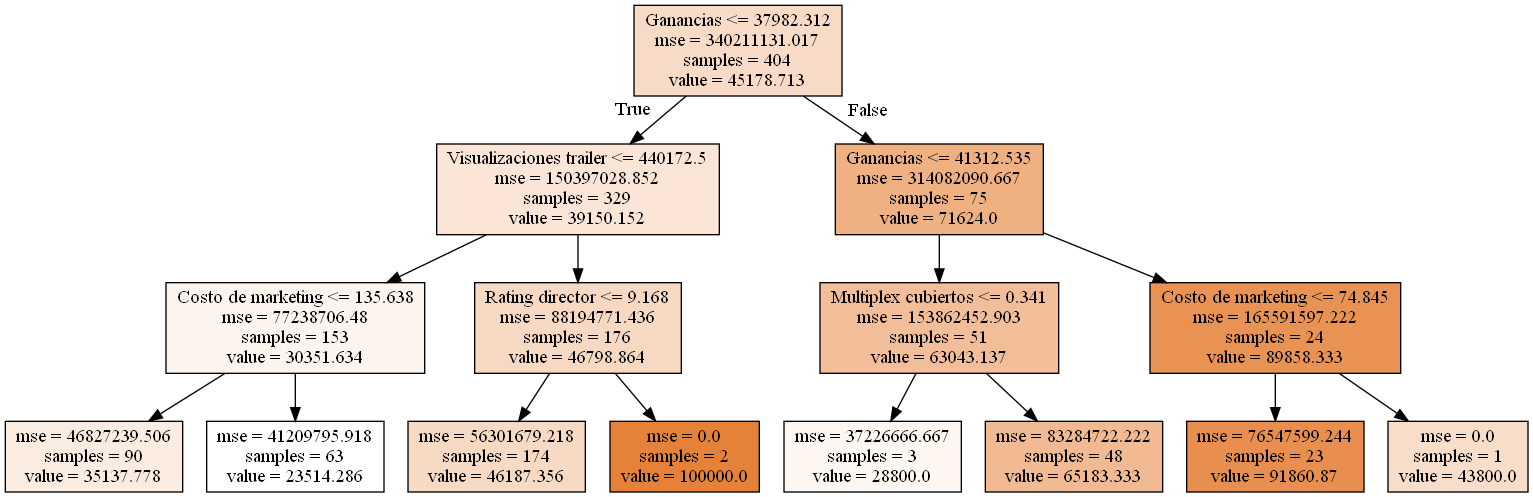

In [40]:
arbolreg1 = tree.DecisionTreeRegressor(max_depth = 3)
arbolreg1.fit(X_train, y_train)
datos_graf = tree.export_graphviz(arbolreg1, out_file = None, feature_names = X_train.columns, filled = True)
graph1 = pydotplus.graph_from_dot_data(datos_graf)
Image(graph1.create_png())

#### Por el número mínimo de observaciones

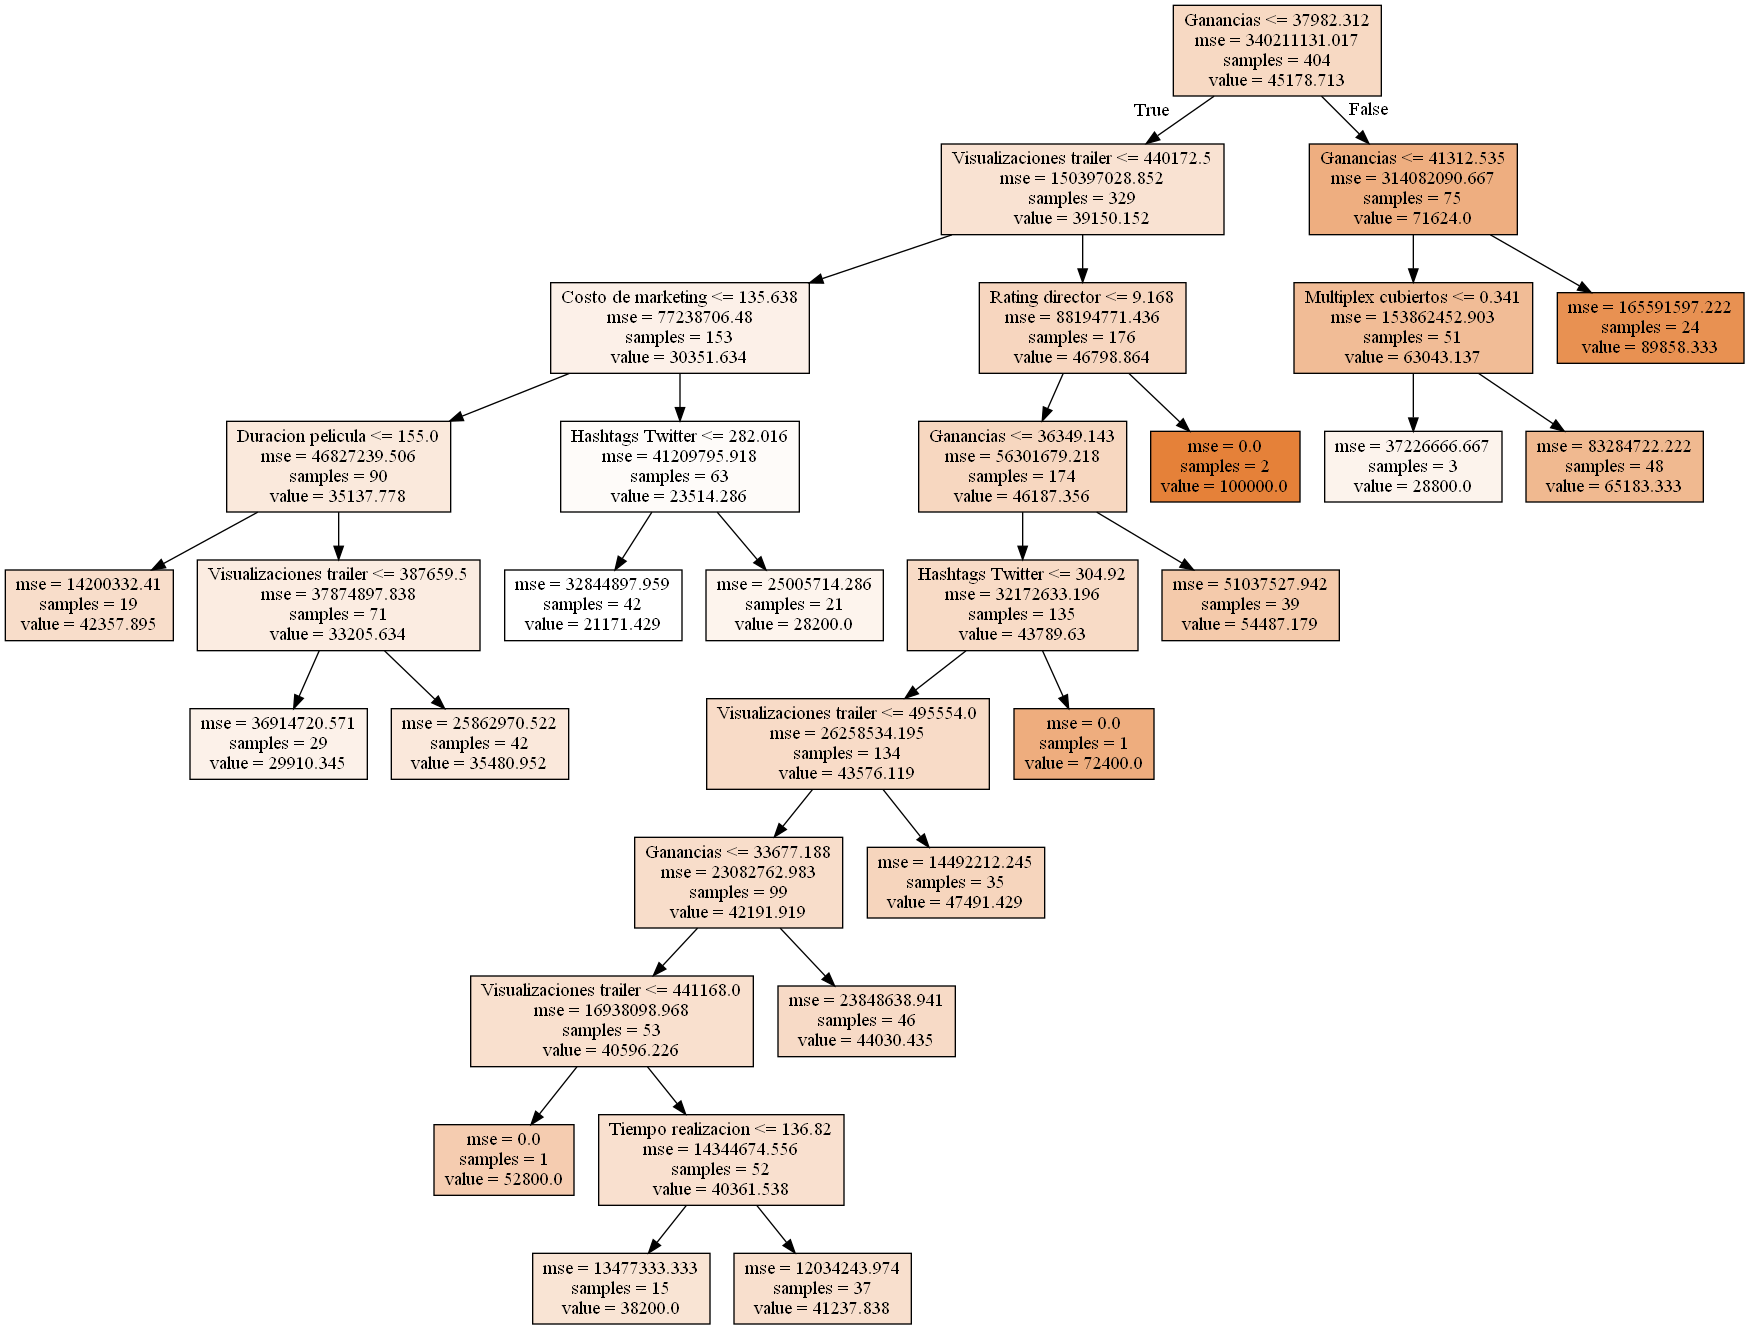

In [41]:
arbolreg2 = tree.DecisionTreeRegressor(min_samples_split = 50)
arbolreg2.fit(X_train, y_train)
datos_graf = tree.export_graphviz(arbolreg2, out_file = None, feature_names = X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(datos_graf)
Image(graph2.create_png())

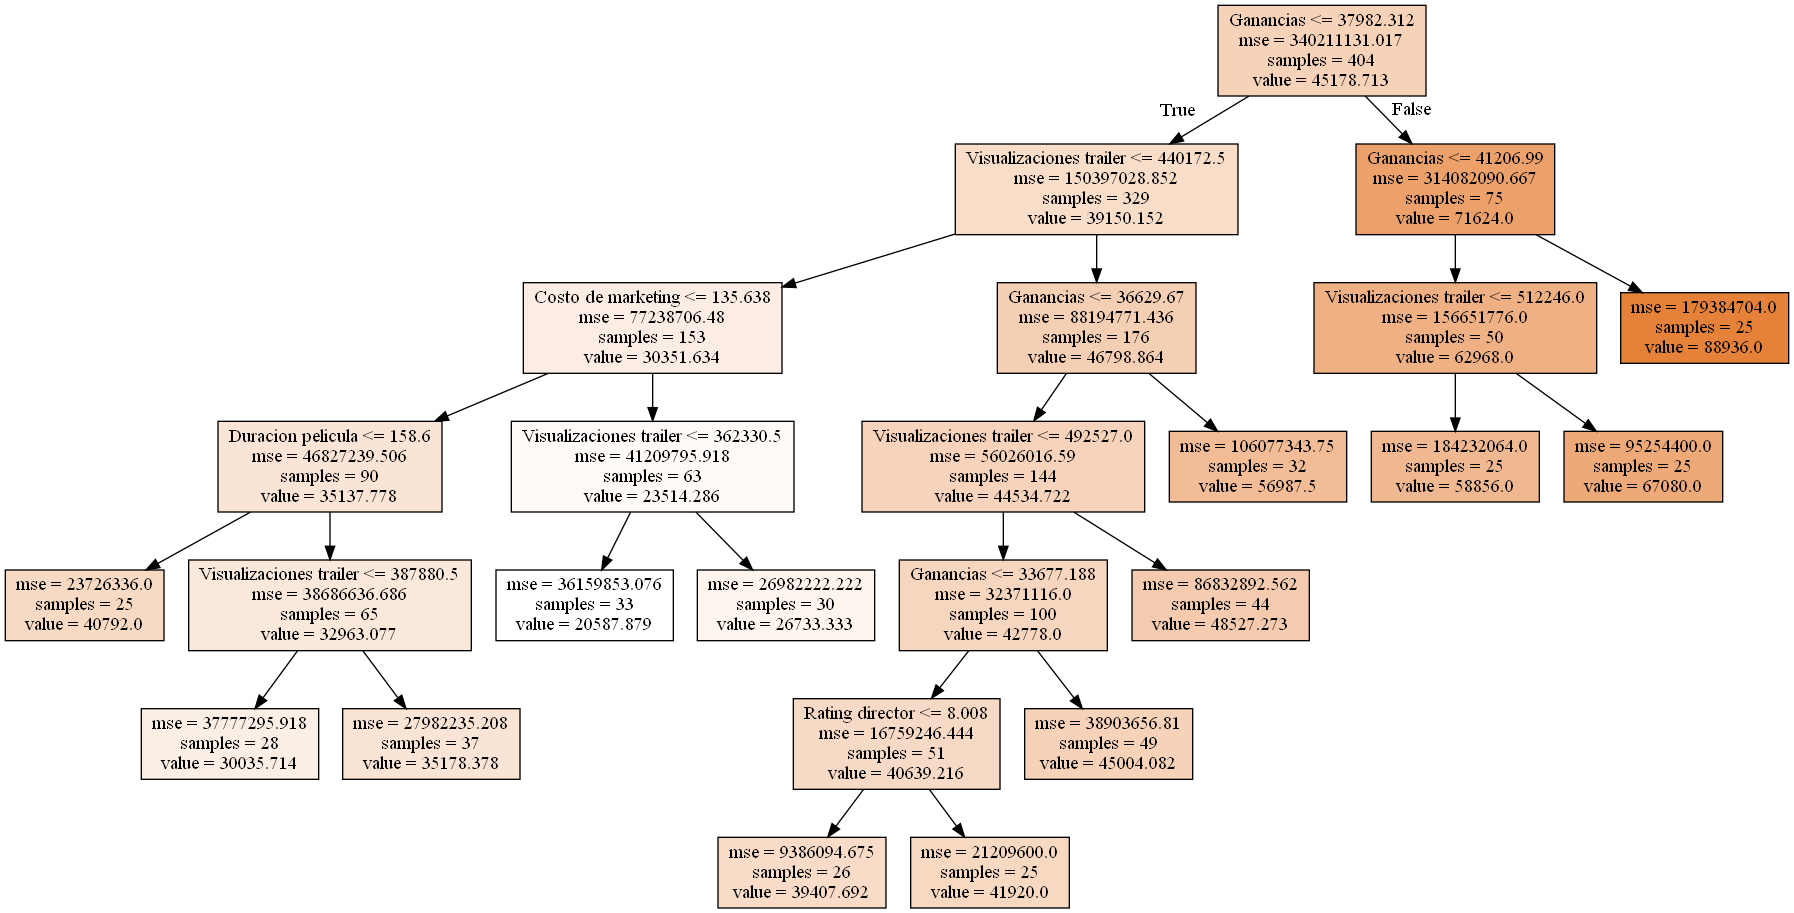

In [42]:
arbolreg3 = tree.DecisionTreeRegressor(min_samples_leaf = 25)
arbolreg3.fit(X_train, y_train)
datos_graf = tree.export_graphviz(arbolreg3, out_file = None, feature_names = X_train.columns, filled = True)
graph3 = pydotplus.graph_from_dot_data(datos_graf)
Image(graph3.create_png())